In [112]:
import matplotlib.pyplot as plt 
import pandas as pd 

df = pd.read_csv("/Users/merrheimmaissane/articles_eco.csv")
df.head()

,Unnamed: 0,Headline,Positive,Negative,Neutral
0,0,Flipboard is moving to the fediverse,0.036494,0.022876,0.940630
1,1,Zach Gage’s Puzzmo gets acquired as the newspa...,0.270819,0.013303,0.715878
2,2,Pokémon Go December 2023 Community Weekend eve...,0.035237,0.028156,0.936606
3,3,Zelda: Tears of the Kingdom devs on why we lik...,0.044214,0.092082,0.863704
4,4,Tears of the Kingdom devs are amped for Zelda’...,0.607652,0.014634,0.377714


In [113]:
new_df = df
new_df['Sentiment'] = ''

for i in range (len(df)):
    if df['Positive'][i]>=0.7:
        new_df['Sentiment'][i]="Positive"
    else : 
        if df['Neutral'][i]>=0.6:
            new_df['Sentiment'][i]="Neutral"
        else : 
            if df['Neutral'][i]>df['Negative'][i]:
                new_df['Sentiment'][i]="Neutral"
            else : 
                new_df['Sentiment'][i]="Negative"

new_df


/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_96988/1557496519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'][i]="Neutral"
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_96988/1557496519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'][i]="Neutral"
/var/folders/ym/71jgxz4j2rz863lgsp_17w240000gn/T/ipykernel_96988/1557496519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Unnamed: 0,Headline,Positive,Negative,Neutral,Sentiment
0,0,Flipboard is moving to the fediverse,0.036494,0.022876,0.940630,Neutral
1,1,Zach Gage’s Puzzmo gets acquired as the newspa...,0.270819,0.013303,0.715878,Neutral
2,2,Pokémon Go December 2023 Community Weekend eve...,0.035237,0.028156,0.936606,Neutral
3,3,Zelda: Tears of the Kingdom devs on why we lik...,0.044214,0.092082,0.863704,Neutral
4,4,Tears of the Kingdom devs are amped for Zelda’...,0.607652,0.014634,0.377714,Neutral
...,...,...,...,...,...,...
95,95,"29"" Vitus Mythique 29 VR Alloy Assembled Bike ...",0.103049,0.012433,0.884518,Neutral
96,96,Vtracer: Next-Gen Raster-to-Vector Conversion,0.057306,0.013044,0.929649,Neutral
97,97,Delving into Cryptocurrency: Top Three Coins E...,0.054435,0.018222,0.927343,Neutral
98,98,Polygon Capital-backed Bioniq to leverage Inte...,0.456943,0.006671,0.536386,Neutral


In [114]:
new_df = new_df.drop('Positive',axis=1)
new_df = new_df.drop('Negative',axis=1)
new_df = new_df.drop('Neutral',axis=1)
new_df = new_df.drop('Unnamed: 0',axis=1)

In [115]:
new_df

,Headline,Sentiment
0,Flipboard is moving to the fediverse,Neutral
1,Zach Gage’s Puzzmo gets acquired as the newspa...,Neutral
2,Pokémon Go December 2023 Community Weekend eve...,Neutral
3,Zelda: Tears of the Kingdom devs on why we lik...,Neutral
4,Tears of the Kingdom devs are amped for Zelda’...,Neutral
...,...,...
95,"29"" Vitus Mythique 29 VR Alloy Assembled Bike ...",Neutral
96,Vtracer: Next-Gen Raster-to-Vector Conversion,Neutral
97,Delving into Cryptocurrency: Top Three Coins E...,Neutral
98,Polygon Capital-backed Bioniq to leverage Inte...,Neutral


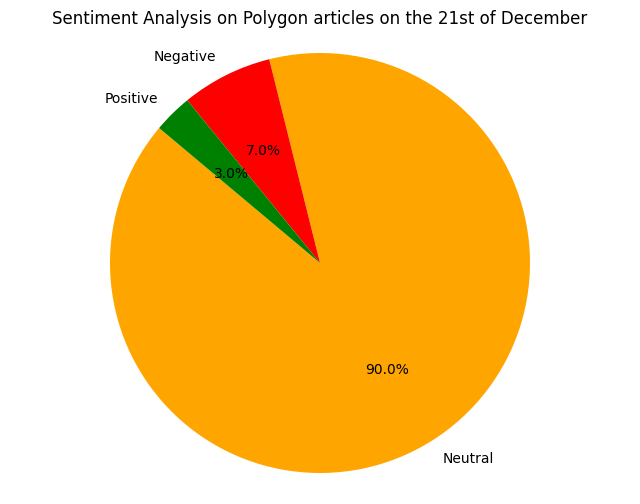

In [116]:
sentiment_counts = df['Sentiment'].value_counts()

# Définir les couleurs pour chaque catégorie
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'orange'}

# Créer le diagramme circulaire avec des couleurs spécifiques pour chaque catégorie
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[key] for key in sentiment_counts.index])
plt.title('Sentiment Analysis on Polygon articles on the 21st of December')
plt.axis('equal')
plt.show()